## SWOT Level 3 Altimetry Data Processing

### Open the downloaded data

In [11]:
import xarray as xr
import matplotlib.pyplot as plt
import glob
from cartopy import crs as ccrs, feature as cfeature

In [3]:
!ls /home/jovyan/shared/cycle_500

SWOT_L3_LR_SSH_Basic_500_001_20230423T175831_20230423T184936_v1.0.nc
SWOT_L3_LR_SSH_Basic_500_002_20230423T184937_20230423T194041_v1.0.nc
SWOT_L3_LR_SSH_Basic_500_003_20230423T194042_20230423T203147_v1.0.nc
SWOT_L3_LR_SSH_Basic_500_004_20230423T203148_20230423T212253_v1.0.nc
SWOT_L3_LR_SSH_Basic_500_005_20230423T212253_20230423T221358_v1.0.nc
SWOT_L3_LR_SSH_Basic_500_006_20230423T221359_20230423T230504_v1.0.nc
SWOT_L3_LR_SSH_Basic_500_007_20230423T230505_20230423T235610_v1.0.nc
SWOT_L3_LR_SSH_Basic_500_008_20230423T235610_20230424T004715_v1.0.nc
SWOT_L3_LR_SSH_Basic_500_009_20230424T004716_20230424T013821_v1.0.nc
SWOT_L3_LR_SSH_Basic_500_010_20230424T013822_20230424T022926_v1.0.nc
SWOT_L3_LR_SSH_Basic_500_011_20230424T022927_20230424T032033_v1.0.nc
SWOT_L3_LR_SSH_Basic_500_012_20230424T032033_20230424T041138_v1.0.nc
SWOT_L3_LR_SSH_Basic_500_013_20230424T041139_20230424T050244_v1.0.nc
SWOT_L3_LR_SSH_Basic_500_014_20230424T050245_20230424T055350_v1.0.nc
SWOT_L3_LR_SSH_Basic_500_015_20230

In [4]:
data_dir = '/home/jovyan/shared/cycle_500/*'
data_files = glob.glob(data_dir)

### Visualize absolute dynamic topography for the first record

In [7]:
ds = xr.open_dataset(data_files[-2])
ds2 = ds.drop_dims('num_nadir')

In [8]:
ds2['ssha'].min(), ds2['ssha'].max()

(<xarray.DataArray 'ssha' ()> Size: 8B
 array(-0.1663),
 <xarray.DataArray 'ssha' ()> Size: 8B
 array(0.3608))

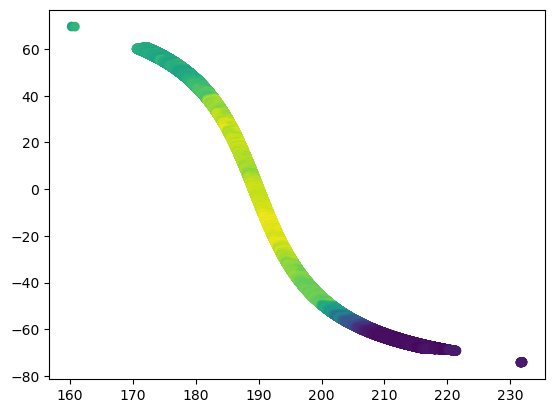

In [18]:
plt.scatter(
    ds2['longitude'],
    ds2['latitude'],
    c=ds2['ssha']+ds2['mdt'],
)

### Preprocess files and open the whole available time record

In [21]:
def preprocess(ds):
    '''
    sets time as the dimension for the files to be concatenated over
    '''
    ds = ds.set_coords('time')
    ds = ds.swap_dims({'num_lines':'time'})
    ds = ds.drop_dims('num_nadir')
    return ds

swot_full = xr.open_mfdataset(data_files, 
                         preprocess=preprocess, 
                         combine='nested',
                         concat_dim='time')

In [22]:
swot_full

<xarray.Dataset> Size: 764MB
Dimensions:         (time: 276080, num_pixels: 69)
Coordinates:
  * time            (time) datetime64[ns] 2MB 2023-04-23T19:40:42.660000 ... ...
    latitude        (time, num_pixels) float64 152MB dask.array<chunksize=(9860, 69), meta=np.ndarray>
    longitude       (time, num_pixels) float64 152MB dask.array<chunksize=(9860, 69), meta=np.ndarray>
Dimensions without coordinates: num_pixels
Data variables:
    mdt             (time, num_pixels) float64 152MB dask.array<chunksize=(9860, 69), meta=np.ndarray>
    ssha            (time, num_pixels) float64 152MB dask.array<chunksize=(9860, 69), meta=np.ndarray>
    ssha_noiseless  (time, num_pixels) float64 152MB dask.array<chunksize=(9860, 69), meta=np.ndarray>
Attributes: (12/42)
    Conventions:                     CF-1.7
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Swath
    comment:                         Sea Surface Height measured by Altimetry
    geospatial_lat_units:            degrees_north
    geospatial_lon_units:            degrees_east
    ...                              ...
    geospatial_lat_min:              -78.272196
    geospatial_lat_max:              78.272247
    geospatial_lon_min:              1.5e-05
    geospatial_lon_max:              359.999928
    data_used:                       SWOT KaRIn L2_LR_SSH PGC0 (NASA/CNES). D...
    doi:                             https://doi.org/10.24400/527896/A01-2023...

### Calculate the absolute dynamic topography (adt)

Add the absolute dynamic topography as a new variable by adding up the mean dynamic topography (mdt) and the sea surface height anomaly (ssha).

In [23]:
swot_full['adt'] = swot_full['mdt'] + swot_full['ssha']

In [24]:
swot_full

<xarray.Dataset> Size: 917MB
Dimensions:         (time: 276080, num_pixels: 69)
Coordinates:
  * time            (time) datetime64[ns] 2MB 2023-04-23T19:40:42.660000 ... ...
    latitude        (time, num_pixels) float64 152MB dask.array<chunksize=(9860, 69), meta=np.ndarray>
    longitude       (time, num_pixels) float64 152MB dask.array<chunksize=(9860, 69), meta=np.ndarray>
Dimensions without coordinates: num_pixels
Data variables:
    mdt             (time, num_pixels) float64 152MB dask.array<chunksize=(9860, 69), meta=np.ndarray>
    ssha            (time, num_pixels) float64 152MB dask.array<chunksize=(9860, 69), meta=np.ndarray>
    ssha_noiseless  (time, num_pixels) float64 152MB dask.array<chunksize=(9860, 69), meta=np.ndarray>
    adt             (time, num_pixels) float64 152MB dask.array<chunksize=(9860, 69), meta=np.ndarray>
Attributes: (12/42)
    Conventions:                     CF-1.7
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Swath
    comment:                         Sea Surface Height measured by Altimetry
    geospatial_lat_units:            degrees_north
    geospatial_lon_units:            degrees_east
    ...                              ...
    geospatial_lat_min:              -78.272196
    geospatial_lat_max:              78.272247
    geospatial_lon_min:              1.5e-05
    geospatial_lon_max:              359.999928
    data_used:                       SWOT KaRIn L2_LR_SSH PGC0 (NASA/CNES). D...
    doi:                             https://doi.org/10.24400/527896/A01-2023...

### Visualize the full SWOT cycle

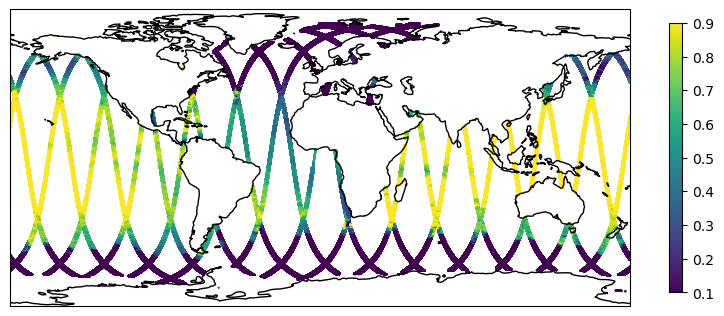

In [27]:
plt.figure(figsize=(10,5))
ax = plt.axes(projection = ccrs.PlateCarree())

ax.add_feature(cfeature.COASTLINE, edgecolor='black', zorder=6)

plt.scatter(
    swot_full['longitude'],
    swot_full['latitude'],
    c = swot_full['adt'],
    vmin=.1,
    vmax=.9,
    s=.3
)
plt.colorbar(shrink=.7)